## Airbnb Visualizations and Graphs

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../data/air_bnb_data_clean.csv')

In [7]:
df.head()

,room_id,neighbourhood,room_type,room_price,minimum_nights,updated_date,city,state
0,575758,Five Points,Entire home/apt,200,180,2020-06-28,Denver,CO
1,1041934,Berkeley,Entire home/apt,215,30,2020-06-28,Denver,CO
2,1311993,CBD,Entire home/apt,90,30,2020-06-28,Denver,CO
3,1557739,Cole,Private room,60,30,2020-06-28,Denver,CO
4,3338717,Rosedale,Entire home/apt,90,2,2020-06-28,Denver,CO


In [8]:
df.describe()

,room_id,room_price,minimum_nights
count,1.937400e+05,193740.000000,1.937400e+05
mean,2.487693e+07,246.121962,5.245869e+02
std,1.283983e+07,672.856858,2.271906e+05
min,1.770000e+02,0.000000,1.000000e+00
25%,1.491971e+07,79.000000,1.000000e+00
50%,2.501000e+07,125.000000,2.000000e+00
75%,3.659798e+07,220.000000,5.000000e+00
max,4.431889e+07,24999.000000,1.000000e+08


In [9]:
price_per_city = pd.DataFrame(df.groupby('city')['room_price'].sum().reset_index())

price_per_city = price_per_city[price_per_city['room_price'] > 0]

In [10]:
price_per_city = price_per_city.sort_values(by = 'room_price', ascending = False)

In [11]:
price_per_city.describe()

,room_price
count,2.400000e+01
mean,1.986820e+06
std,2.307463e+06
min,5.062000e+04
25%,4.715982e+05
50%,1.153182e+06
75%,2.493685e+06
max,8.725135e+06


In [12]:
price_per_city['city'].unique()

array(['Hawaii', 'New York City', 'Austin', 'San Diego', 'Twin Cities',
       'Ft Lauderdale', 'Nashville', 'Las Vegas', 'San Francisco',
       'Washington Dc', 'New Orleans', 'Chicago', 'Seattle', 'Denver',
       'Boston', 'Portland', 'San Mateo County', 'Asheville', 'Columbus',
       'Oakland', 'Santa Cruz County', 'Jersey City', 'Cambridge',
       'Salem Or'], dtype=object)

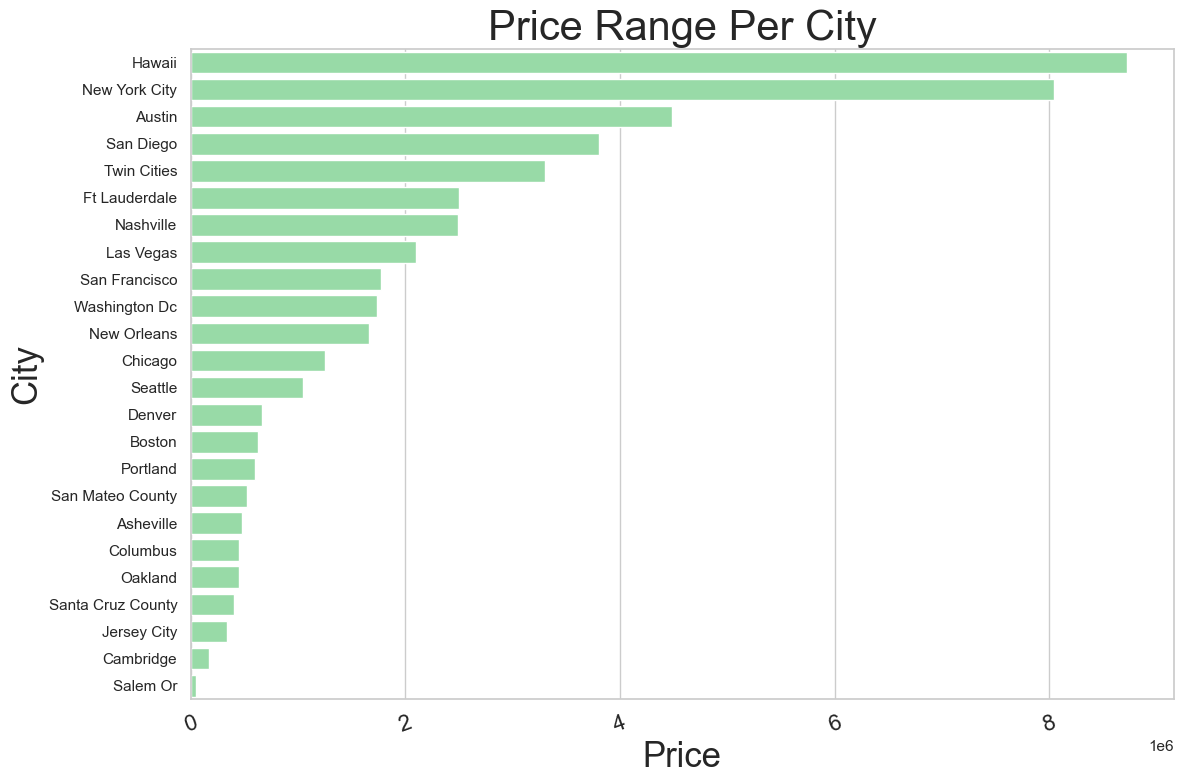

In [13]:
#plot Settings
plt.figure(figsize = (12, 8))
sns.set_theme(style="whitegrid")
plt.tight_layout()

sns.set_color_codes("pastel")
sns.barplot(data = price_per_city,
            x = 'room_price',
            y = 'city',
           color = 'g')

#plot Labels
plt.title('Price Range Per City', size = 30)

plt.xlabel('Price', size = 25)
plt.xticks(size = 16, rotation = 20)
plt.ylabel('City', size = 25)

#save and export
plt.tight_layout()
plt.savefig('../images/price_range.png')

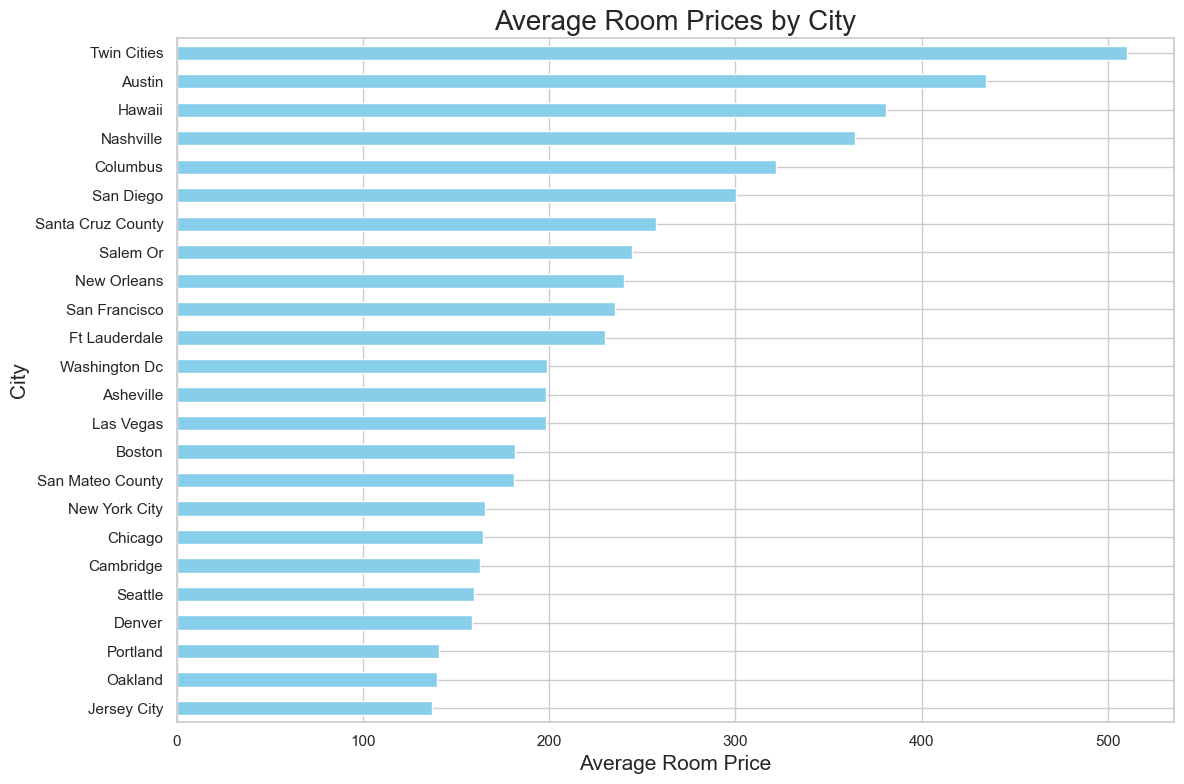

In [14]:
#calculate average room price by neighborhood
average_room_prices = df.groupby('city')['room_price'].mean().sort_values()

#bar chart
plt.figure(figsize=(12, 8))
average_room_prices.plot(kind='barh', color='skyblue')
plt.title('Average Room Prices by City', size=20)
plt.xlabel('Average Room Price', size=15)
plt.ylabel('City', size=15)
plt.grid(True)

plt.tight_layout()
plt.savefig('../images/avg_room_price.png')
plt.show()


In [15]:
cities = ['Denver', 'Chicago', 'New York City', 'San Francisco', 'Seattle', 'New Orleans', 'Portland', 'Las Vegas', 'Ft Lauderdale', 'San Diego',
          'New Orleans']
top_cities = df[df['city'].isin(cities)]

In [16]:
avg_price_by_city = top_cities.groupby('city')['room_price'].mean().reset_index()
avg_price_by_city = avg_price_by_city.rename(columns={'room_price': 'Average Room Price'})

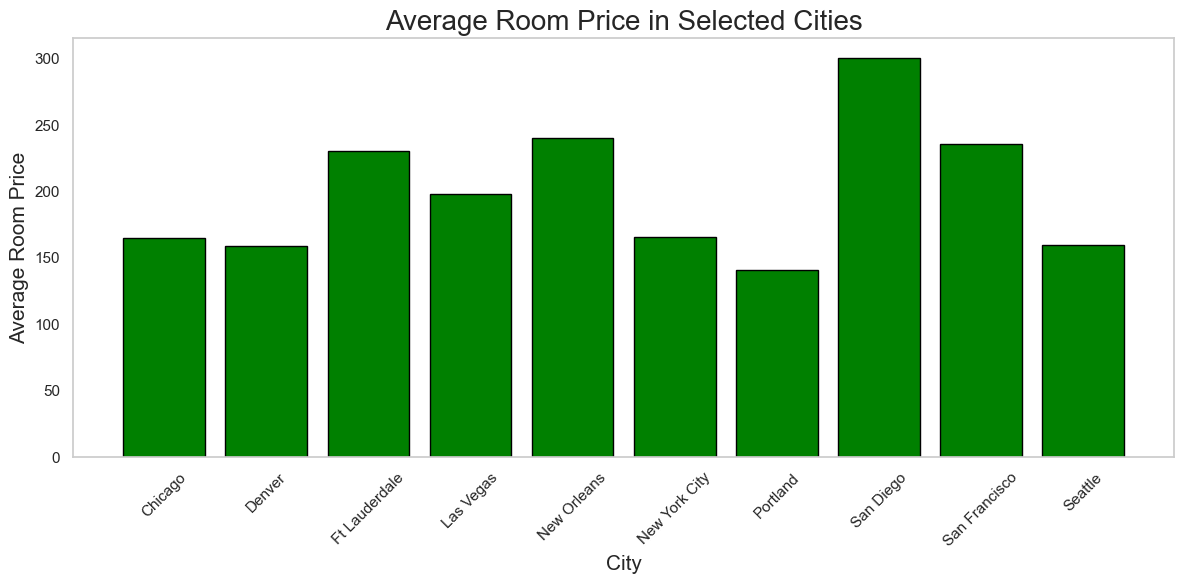

In [17]:
plt.figure(figsize=(12,6))
plt.bar(avg_price_by_city['city'], avg_price_by_city['Average Room Price'], color='green', edgecolor='black')
plt.title('Average Room Price in Selected Cities', size=20)
plt.xlabel('City', size=15)
plt.ylabel('Average Room Price', size=15)
plt.xticks(rotation=45)
plt.grid(False)


plt.tight_layout()
plt.savefig('../images/avg_room_price_selected_cities.jpg')
plt.show();